## <font color = blue>Assignment on Classification

### Import the necessary libraries & Load the dataset into python environment :

In [1]:
import numpy as np
import pandas as pd

# Plotting the data:
import matplotlib.pyplot as plt
import seaborn as sns 


# Preprocessing the dataset:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Testing and Training data set selection:
from sklearn.model_selection import train_test_split

# Classification algorithms:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Analysis of classificaiton algorithms:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [2]:
# Remove warnings:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
data = pd.read_excel(r'C:\Users\sajee\Downloads\AATHIRA DSA\iris_dataset.xls') 
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Perform data understanding and exploration:

In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


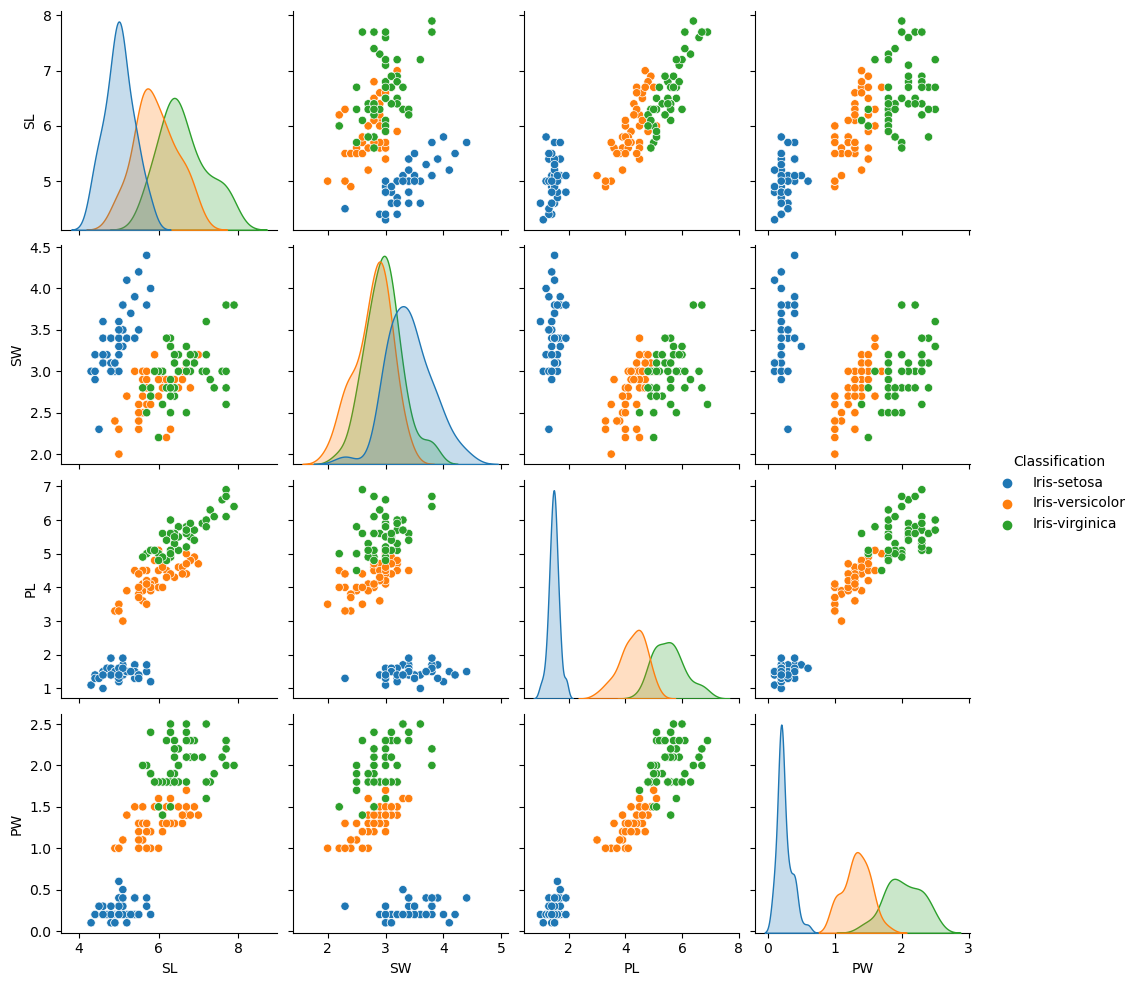

In [8]:
# Explore the relationship between variables in dataset using pair plot:

sns.pairplot(data, hue="Classification")
plt.show()

### Perform data cleaning and outlier detection:

In [9]:
# Check for missing values:

data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

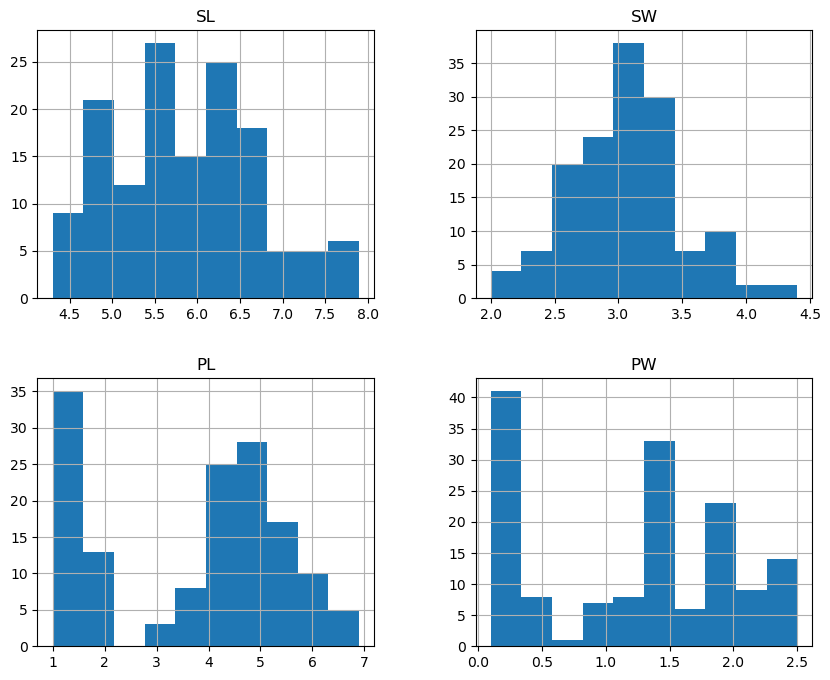

In [10]:
# Handle the missing values:

freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,8))
plt.show()

In [11]:
# Fill missing values with median:

for col in ['SL', 'SW','PL']:
    data[col]=data[col].fillna(data[col].median())

In [12]:
# Again check for count of null values in each column after filling the missing values:

data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

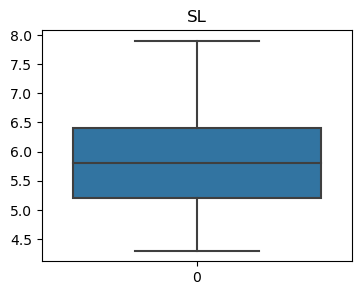

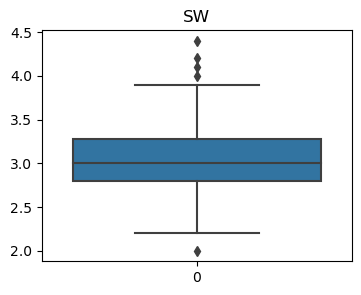

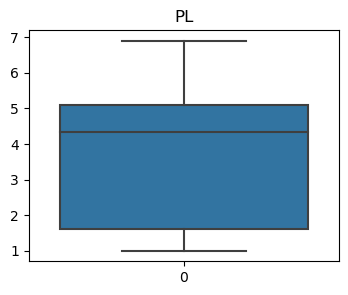

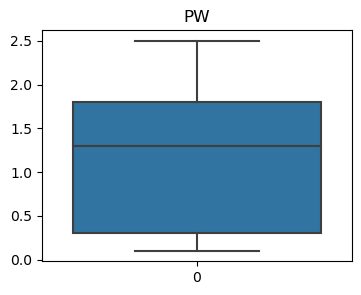

In [13]:
# Check for outliers:

num_cols = ['SL','SW','PL','PW']

for i in num_cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(data[i])
    plt.title(i)

In [14]:
# Handle the outliers in SW:

# Calculate the quartiles Q1, Q2 (median), and Q3 of the 'SW' column :

Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 2.8
Q2 = 3.0
Q3 = 3.25


In [15]:
# Calculate the interquartile range (IQR):

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 0.4500000000000002


In [16]:
# Define the upper and lower limits for outliers:

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  3.9250000000000003
low_lim =  2.1249999999999996


In [17]:
# Initialize the list to store outliers:

outliers = []

for x in data ['SW'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [18]:
# Replace outliers in the 'SW' column of the dataset with upper and lower limits using Flooring and Capping operation :

data['SW'] = np.where(data['SW'] > up_lim, up_lim, np.where(data['SW'] < low_lim, low_lim, data['SW']))

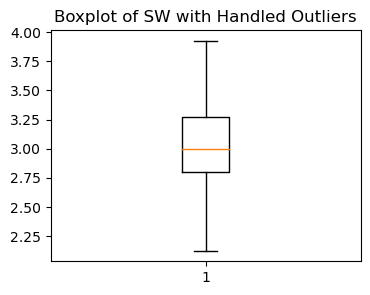

In [19]:
# Again check for outliers after filling:

plt.figure(figsize=(4, 3))
plt.boxplot(data['SW'])
plt.title('Boxplot of SW with Handled Outliers')
plt.show()

### Create a Heatmap to Visualize the Correlation:

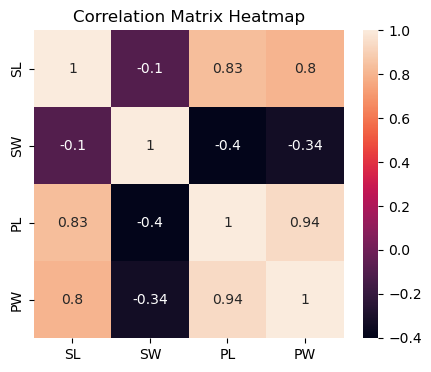

In [20]:
#Calculate the correlation matrix:

corr_matrix = data.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Preprocess the Data:

In [21]:
# Check the distribution of the target variable:

data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

### Perfome Encoding:

In [22]:
# Perform Label encoding:

# Target variable is a categorical variable representing different species of iris flowers.
# Label encoding is typically used when the target variable is a categorical column in a classification problem.

In [23]:
le = LabelEncoder()

In [24]:
data['Classification'] = le.fit_transform(data['Classification'])

In [25]:
data.head(3)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0


In [26]:
data['Classification'].value_counts(normalize = True)

0    0.333333
1    0.333333
2    0.333333
Name: Classification, dtype: float64

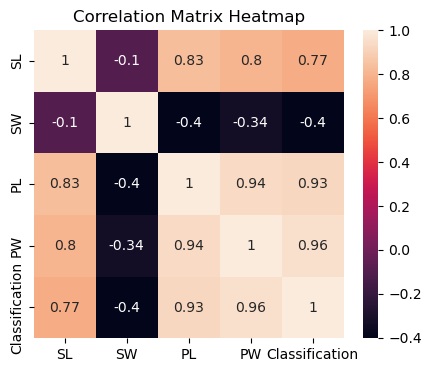

In [27]:
#Calculate the correlation matrix after encoding :

corr_matrix = data.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Train and Evaluate the models by applying Classification Algorithms: 

In [28]:
# Trying different classification algorithms and finding the best result:

# Initialize a dictionary to store the accuracy:
accuracies = {}

# Initialize a dictionary to store confusion matrices:
confusion_matrices = {}

#### <font color = blue> Without Scaling:

In [29]:
# Split the data into features (X) and target (y):

X = data.drop(['Classification'],axis = 1)   # independent variable
y = data['Classification']   #dependent variable

In [30]:
# Split the dataset into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### 1. Logistic Regression Classifier:

In [31]:
# Train the logistic regression model:
logit_model = LogisticRegression()
logit_model.fit(X_train , y_train) 

# Make predictions on the test set:
y_pred_lr = logit_model.predict(X_test)  

In [32]:
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('precision = ',precision_score(y_test,y_pred_lr, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_lr, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_lr, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_lr))

Accuracy =  1.0
precision =  1.0
Recall =  1.0
f1 score = 1.0
confusion_matrix =
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [33]:
accuracies['Logistic Regression (No Scaling)'] = accuracy_score(y_test,y_pred_lr)
confusion_matrices['Logistic Regression (No Scaling)'] = confusion_matrix(y_test,y_pred_lr)

###### 2. k-Nearest Neighbors (kNN) Classifier :

In [34]:
# Initialize the list to store accuracy scores:

metric = []
neighbors = np.arange(3, 15)  # Set the desired range here

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

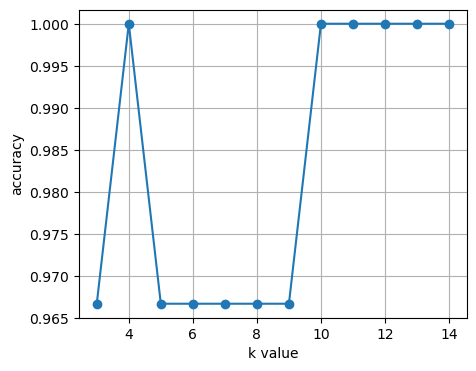

In [35]:
# Plot the number of neighbors (k value) and the corresponding accuracy metric:

plt.figure(figsize=(5,4))
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [36]:
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski',p=2)

# Train the kNN classifier:
classifier.fit(X_train,y_train)   

# Make predictions on the test set:
y_pred_knn = classifier.predict(X_test)   

In [37]:
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_knn,average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_knn))

Accuracy =  1.0
precision =  1.0
Recall =  1.0
f1 score = 1.0
confusion_matrix =
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [38]:
accuracies['kNN (No Scaling)'] = accuracy_score(y_test,y_pred_knn)
confusion_matrices['kNN (No Scaling)'] = confusion_matrix(y_test,y_pred_knn)

###### 3. Support Vector Machines (SVM) Classifier: 

In [39]:
# Train the SVM classifier:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the test set:
y_pred_svm = svm.predict(X_test)

In [40]:
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))
print('precision = ',precision_score(y_test,y_pred_svm, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_svm, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_svm, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_svm))

Accuracy =  1.0
precision =  1.0
Recall =  1.0
f1 score = 1.0
confusion_matrix =
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [41]:
accuracies['SVM (No Scaling)'] = accuracy_score(y_test,y_pred_svm)
confusion_matrices['SVM (No Scaling)'] = confusion_matrix(y_test,y_pred_svm)

###### 4. Decision Tree Classifier: 

In [42]:
# Train the Decision Tree classifier:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# Make predictions on the test set:
y_pred_dt = dt.predict(X_test)

In [43]:
print('Accuracy = ',accuracy_score(y_test,y_pred_dt))
print('precision = ',precision_score(y_test,y_pred_dt, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_dt, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_dt, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_dt))

Accuracy =  1.0
precision =  1.0
Recall =  1.0
f1 score = 1.0
confusion_matrix =
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [44]:
accuracies['Decision Tree (No Scaling)'] = accuracy_score(y_test,y_pred_dt)
confusion_matrices['Decision Tree (No Scaling)'] = confusion_matrix(y_test,y_pred_dt)

###### 5. Random Forest Classifier:

In [45]:
# Train the Random Forest classifier:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test set:
y_pred_rf = rf.predict(X_test)

In [46]:
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))
print('precision = ',precision_score(y_test,y_pred_rf, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_rf, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_rf, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_rf))

Accuracy =  1.0
precision =  1.0
Recall =  1.0
f1 score = 1.0
confusion_matrix =
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [47]:
accuracies['Random Forest (No Scaling)'] = accuracy_score(y_test,y_pred_rf)
confusion_matrices['Random Forest (No Scaling)'] = confusion_matrix(y_test,y_pred_rf)

#### <font color = blue> Standard Scaling :

In [48]:
X = data.drop(['Classification'],axis = 1) 

# Perform standard scaling:
std_scl = StandardScaler()
X_std_scl = std_scl.fit_transform(X)
X_std_scl = pd.DataFrame(X_std_scl)

# Split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_std_scl, y, test_size=0.2, random_state=42)

###### 1. Logistic Regression Classifier:

In [49]:
# Train the logistic regression classifier:
logit_model = LogisticRegression()
logit_model.fit(X_train , y_train)

# Make predictions on the test set:
y_pred_lr = logit_model.predict(X_test)

In [50]:
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('precision = ',precision_score(y_test,y_pred_lr, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_lr, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_lr, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_lr))

Accuracy =  0.9666666666666667
precision =  0.9722222222222222
Recall =  0.9629629629629629
f1 score = 0.9658994032395567
confusion_matrix =
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [51]:
accuracies['Logistic Regression (Standard Scaling)'] = accuracy_score(y_test,y_pred_lr)
confusion_matrices['Logistic Regression (Standard Scaling)'] = confusion_matrix(y_test,y_pred_lr)

###### 2. k-Nearest Neighbors (kNN) Classifier : 

In [52]:
# Initialize the list to store accuracy scores:

metric = []
neighbors = np.arange(3, 15)  # Set the desired range here

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

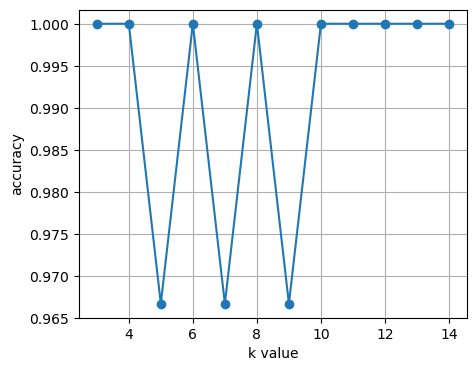

In [53]:
# Plot the number of neighbors (k value) and the corresponding accuracy metric:

plt.figure(figsize=(5,4))
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [54]:
classifier = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski',p=2)

# Train the kNN Classifier:
classifier.fit(X_train,y_train)   

# Make predictions on the test set:
y_pred_knn = classifier.predict(X_test)   

In [55]:
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_knn,average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_knn))

Accuracy =  1.0
precision =  1.0
Recall =  1.0
f1 score = 1.0
confusion_matrix =
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [56]:
accuracies['kNN (Standard Scaling)'] = accuracy_score(y_test,y_pred_knn)
confusion_matrices['kNN (Standard Scaling)'] = confusion_matrix(y_test,y_pred_knn)

###### 3. Support Vector Machines (SVM) Classifier:

In [57]:
# Train the SVM classifier:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the test set:
y_pred_svm = svm.predict(X_test)

In [58]:
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))
print('precision = ',precision_score(y_test,y_pred_svm, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_svm, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_svm, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_svm))

Accuracy =  0.9666666666666667
precision =  0.9722222222222222
Recall =  0.9629629629629629
f1 score = 0.9658994032395567
confusion_matrix =
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [59]:
accuracies['SVM (Standard Scaling)'] = accuracy_score(y_test,y_pred_svm)
confusion_matrices['SVM (Standard Scaling)'] = confusion_matrix(y_test,y_pred_svm)

###### 4. Decision Tree Classifier : 

In [60]:
# Train the Decision Tree classifier:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# Make predictions on the test set:
y_pred_dt = dt.predict(X_test)

In [61]:
print('Accuracy = ',accuracy_score(y_test,y_pred_dt))
print('precision = ',precision_score(y_test,y_pred_dt, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_dt, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_dt, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_dt))

Accuracy =  1.0
precision =  1.0
Recall =  1.0
f1 score = 1.0
confusion_matrix =
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [62]:
accuracies['Decision Tree (Standard Scaling)'] = accuracy_score(y_test,y_pred_dt)
confusion_matrices['Decision Tree (Standard Scaling)'] = confusion_matrix(y_test,y_pred_dt)

###### 5. Random Forest Classifier:

In [63]:
# Train the Random Forest classifier:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test set:
y_pred_rf = rf.predict(X_test)

In [64]:
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))
print('precision = ',precision_score(y_test,y_pred_rf, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_rf, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_rf, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_rf))

Accuracy =  1.0
precision =  1.0
Recall =  1.0
f1 score = 1.0
confusion_matrix =
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [65]:
accuracies['Random Forest (Standard Scaling)'] = accuracy_score(y_test,y_pred_rf)
confusion_matrices['Random Forest (Standard Scaling)'] = confusion_matrix(y_test,y_pred_rf)

#### <font color = blue>Min-Max Scaling:

In [66]:
X = data.drop(['Classification'],axis = 1) 

# Perform MinMax scaling:
minmax_scl = MinMaxScaler()
X_minmax_scl = minmax_scl.fit_transform(X)
X_minmax_scl = pd.DataFrame(X_minmax_scl)

# Split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_minmax_scl, y, test_size=0.2, random_state=42)

###### 1. Logistic Regression Classifier:

In [67]:
# Train the logistic regression classifier:
logit_model = LogisticRegression()
logit_model.fit(X_train , y_train)

# Make predictions on the test set:
y_pred_lr = logit_model.predict(X_test)

In [68]:
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('precision = ',precision_score(y_test,y_pred_lr, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_lr, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_lr, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_lr))

Accuracy =  0.9666666666666667
precision =  0.9722222222222222
Recall =  0.9629629629629629
f1 score = 0.9658994032395567
confusion_matrix =
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [69]:
accuracies['Logistic Regression (Min-Max Scaling)'] = accuracy_score(y_test,y_pred_lr)
confusion_matrices['Logistic Regression (Min-Max Scaling)'] = confusion_matrix(y_test,y_pred_lr)

###### 2. k-Nearest Neighbors (kNN) Classifier :

In [70]:
# Initialize the list to store accuracy scores:

metric = []
neighbors = np.arange(3, 15)  # Set the desired range here

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

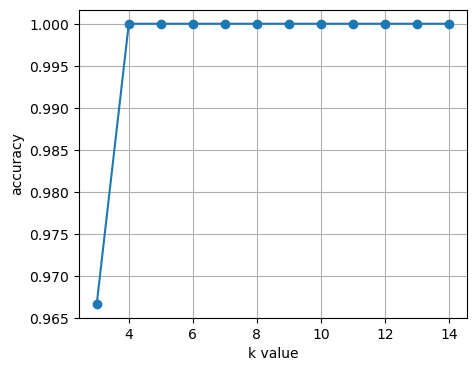

In [71]:
# Plot the number of neighbors (k value) and the corresponding accuracy metric:

plt.figure(figsize=(5,4))
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [72]:
classifier = KNeighborsClassifier(n_neighbors = 14, metric = 'minkowski',p=2)

# Train the kNN classifier:
classifier.fit(X_train,y_train)   

# Make predictions on the test set:
y_pred_knn = classifier.predict(X_test)   

In [73]:
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_knn,average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_knn))

Accuracy =  1.0
precision =  1.0
Recall =  1.0
f1 score = 1.0
confusion_matrix =
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [74]:
accuracies['kNN (Min-Max Scaling)'] = accuracy_score(y_test,y_pred_knn)
confusion_matrices['kNN (Min-Max Scaling)'] = confusion_matrix(y_test,y_pred_knn)

###### 3.  Support Vector Machines (SVM) Classifier:

In [75]:
# Train the SVM classifier:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the test set:
y_pred_svm = svm.predict(X_test)

In [76]:
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))
print('precision = ',precision_score(y_test,y_pred_svm, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_svm, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_svm, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_svm))

Accuracy =  1.0
precision =  1.0
Recall =  1.0
f1 score = 1.0
confusion_matrix =
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [77]:
accuracies['SVM (Min-Max Scaling)'] = accuracy_score(y_test,y_pred_svm)
confusion_matrices['SVM (Min-Max Scaling)'] = confusion_matrix(y_test,y_pred_svm)

###### 4. Decision Tree Classifier:

In [78]:
# Train the Decision Tree classifier:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# Make predictions on the test set:
y_pred_dt = dt.predict(X_test)

In [79]:
print('Accuracy = ',accuracy_score(y_test,y_pred_dt))
print('precision = ',precision_score(y_test,y_pred_dt, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_dt, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_dt, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_dt))

Accuracy =  1.0
precision =  1.0
Recall =  1.0
f1 score = 1.0
confusion_matrix =
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [80]:
accuracies['Decision Tree (Min-Max Scaling)'] = accuracy_score(y_test,y_pred_dt)
confusion_matrices['Decision Tree (Min-Max Scaling)'] = confusion_matrix(y_test,y_pred_dt)

###### 5. Random Forest Classifier:

In [81]:
# Train the Random Forest classifier:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test set:
y_pred_rf = rf.predict(X_test)

In [82]:
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))
print('precision = ',precision_score(y_test,y_pred_rf, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_rf, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_rf, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_rf))

Accuracy =  1.0
precision =  1.0
Recall =  1.0
f1 score = 1.0
confusion_matrix =
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [83]:
accuracies['Random Forest (Min-Max Scaling)'] = accuracy_score(y_test,y_pred_rf)
confusion_matrices['Random Forest (Min-Max Scaling)'] = confusion_matrix(y_test,y_pred_rf)

In [84]:
# Display confusion matrices:

for model, cm in confusion_matrices.items():
    print(f"\nConfusion Matrix: {model}")
    print(cm)


Confusion Matrix: Logistic Regression (No Scaling)
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Confusion Matrix: kNN (No Scaling)
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Confusion Matrix: SVM (No Scaling)
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Confusion Matrix: Decision Tree (No Scaling)
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Confusion Matrix: Random Forest (No Scaling)
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Confusion Matrix: Logistic Regression (Standard Scaling)
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Confusion Matrix: kNN (Standard Scaling)
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Confusion Matrix: SVM (Standard Scaling)
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Confusion Matrix: Decision Tree (Standard Scaling)
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Confusion Matrix: Random Forest (Standard Scaling)
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Confusion Matrix: Logistic Regression (Min-Max Scaling)
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Confusion Matrix: kNN (Min-Max Scaling)
[[10  0  0]
 [ 0  9  0]
 [ 0  0 1

In [85]:
# Print the Results based on Accuracy:

print("Results:")
for model, accuracy in accuracies.items():
    print(f"{model}: {accuracy}")

Results:
Logistic Regression (No Scaling): 1.0
kNN (No Scaling): 1.0
SVM (No Scaling): 1.0
Decision Tree (No Scaling): 1.0
Random Forest (No Scaling): 1.0
Logistic Regression (Standard Scaling): 0.9666666666666667
kNN (Standard Scaling): 1.0
SVM (Standard Scaling): 0.9666666666666667
Decision Tree (Standard Scaling): 1.0
Random Forest (Standard Scaling): 1.0
Logistic Regression (Min-Max Scaling): 0.9666666666666667
kNN (Min-Max Scaling): 1.0
SVM (Min-Max Scaling): 1.0
Decision Tree (Min-Max Scaling): 1.0
Random Forest (Min-Max Scaling): 1.0


In [86]:
# Initialize a dictionary to store the accuracy
accuracy = {}

# Find the maximum accuracy
max_accuracy = max(accuracies.values())

# Find the best models with the maximum accuracy
best_models = [model for model, accuracy in accuracies.items() if accuracy == max_accuracy]

# Find the confusion matrix of the best models
best_cm = {model: confusion_matrices[model] for model in best_models}

# Print the best models based on confusion matrix
print("\nBest Models:")
for model in best_cm:
    print(model)

# Print the confusion matrix of the best models
print("Confusion Matrix:\n", cm)
print("Accuracy:", max_accuracy)



Best Models:
Logistic Regression (No Scaling)
kNN (No Scaling)
SVM (No Scaling)
Decision Tree (No Scaling)
Random Forest (No Scaling)
kNN (Standard Scaling)
Decision Tree (Standard Scaling)
Random Forest (Standard Scaling)
kNN (Min-Max Scaling)
SVM (Min-Max Scaling)
Decision Tree (Min-Max Scaling)
Random Forest (Min-Max Scaling)
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0


#### Since most of the models have achieved the same highest accuracy regardless of scaling, it suggests that the scaling process did not have a significant impact on the classification performance for this particular dataset,So we can consider the model trained on the original data (without scaling) as a good model.Here Logistic Regression (No Scaling) , kNN (No Scaling) , SVM (No Scaling) , Decision Tree (No Scaling) , Random Forest (No Scaling) have achieved the same accuracy.